In [1]:
import numpy as np # 벡터, 행렬 등 수치 연산을 수행하는 선형대수 라이브러리
import pandas as pd # 시리즈, 데이터프레임 포맷 데이터 처리를 위한 라이브러리
import warnings; warnings.filterwarnings(action='ignore') # 경고 메시지 무시
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
import pickle # 객체 입출력을 위한 라이브러리
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.ensemble import RandomForestClassifier as RFC # 랜덤포레스트 분류 알고리즘
from sklearn.tree import DecisionTreeClassifier as DTC # 의사결정나무 분류 알고리즘
from sklearn.ensemble import GradientBoostingClassifier as GBC # 그래디언트 부스팅 분류 알고리즘
# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import math

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_excel("C:\\Users\\user\\Desktop\\machine\\data_1017.xlsx",sheet_name="Sheet1")
label_encoder = LabelEncoder()

df = df.drop(['fixed_type','ht_omr_data'], axis=1)

In [3]:
df

,sex,sc_code,age,FG,t1,t2,t3,t4,t5,t6,...,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27
0,1,3,32,0,48,55,57,54,46,59,...,68,44,62,37,49,53,51,46,39,61
1,1,1,39,0,61,56,61,60,50,57,...,26,42,41,30,39,43,54,44,57,41
2,1,4,39,0,46,36,51,52,46,52,...,44,43,55,47,44,44,48,45,43,65
3,2,3,34,0,46,54,46,61,48,59,...,34,44,41,36,46,44,40,46,41,57
4,1,2,34,0,37,39,46,50,44,57,...,61,42,45,46,42,43,42,44,41,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,1,3,39,0,44,51,51,56,58,57,...,57,43,41,41,44,51,53,45,58,53
30867,1,1,29,0,43,53,43,49,43,46,...,66,52,80,60,55,60,45,57,47,38
30868,2,1,38,0,45,35,53,42,44,45,...,57,51,47,64,52,43,41,43,40,39
30869,2,1,18,0,43,51,50,44,51,52,...,54,45,41,40,50,42,50,46,42,45


In [4]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['FG'])

y = df['FG']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000, stratify=y)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# 기본 모델 정의
model = RandomForestClassifier(random_state=1000)

# 파라미터 범위 설정 (랜덤으로 선택할 값들)
param_dist = {
    'n_estimators': np.arange(1, 1001, 5),
    'max_depth': np.arange(0, 101, 1),
    'min_samples_split': np.arange(1, 101, 2),
    'min_samples_leaf': np.arange(1, 101, 2),
    'bootstrap': [True, False],
    'class_weight': ['balanced']
}

# RandomizedSearchCV 설정
random_search = RandomizedSearchCV(estimator=model, 
                                   param_distributions=param_dist, 
                                   n_iter=50,  # 테스트할 파라미터 조합 수
                                   scoring='roc_auc',  # AUC를 기준으로 평가
                                   cv=5,  # 교차 검증 수행
                                   verbose=2,  # 출력 정보
                                   random_state=1000, 
                                   n_jobs=-1)  # 모든 CPU 코어 사용

# 모델 학습
random_search.fit(x_train, y_train)

# 최적 파라미터 및 성능 출력
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_auc = random_search.best_score_

print(f"\n최적의 파라미터: {best_params}")
print(f"최적 모델의 AUC (CV 기준): {best_auc:.4f}")

# 최적 모델로 테스트 데이터 예측
y_pred_best = best_model.predict(x_test)

# 성능 확인 (혼동 행렬 및 분류 보고서)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# 테스트 데이터에서 최종 AUC 계산
final_auc = roc_auc_score(y_test, y_pred_best)
print(f"\n최종 테스트 데이터 AUC: {final_auc:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits

최적의 파라미터: {'n_estimators': 936, 'min_samples_split': 33, 'min_samples_leaf': 1, 'max_depth': 77, 'class_weight': 'balanced', 'bootstrap': False}
최적 모델의 AUC (CV 기준): 0.9967

Confusion Matrix:
 [[5710   56]
 [  30  379]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5766
           1       0.87      0.93      0.90       409

    accuracy                           0.99      6175
   macro avg       0.93      0.96      0.95      6175
weighted avg       0.99      0.99      0.99      6175


최종 테스트 데이터 AUC: 0.9585


Accuracy: 0.9860728744939271


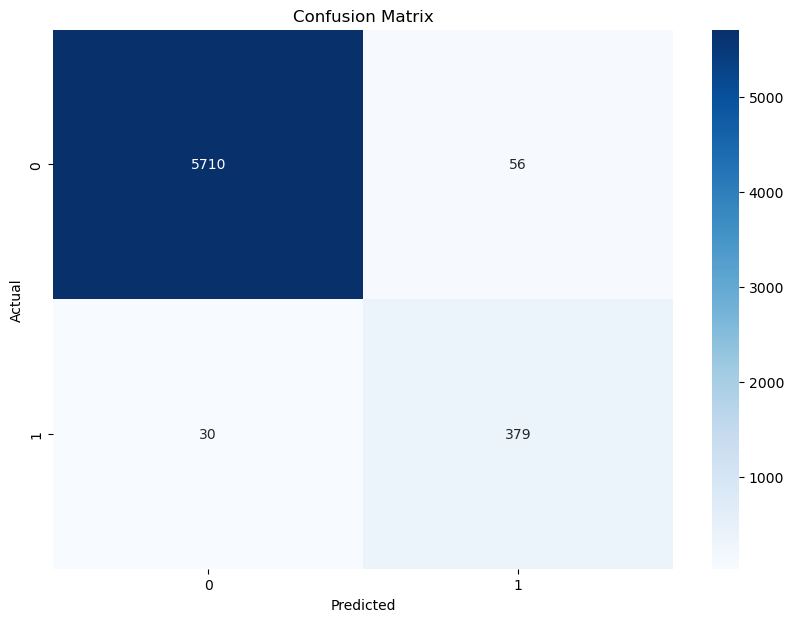

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5766
           1       0.87      0.93      0.90       409

    accuracy                           0.99      6175
   macro avg       0.93      0.96      0.95      6175
weighted avg       0.99      0.99      0.99      6175

Balanced Accuracy: 0.9585
F1-Score: 0.8981
Precision: 0.8713
Recall: 0.9267
ROC-AUC: 0.9585


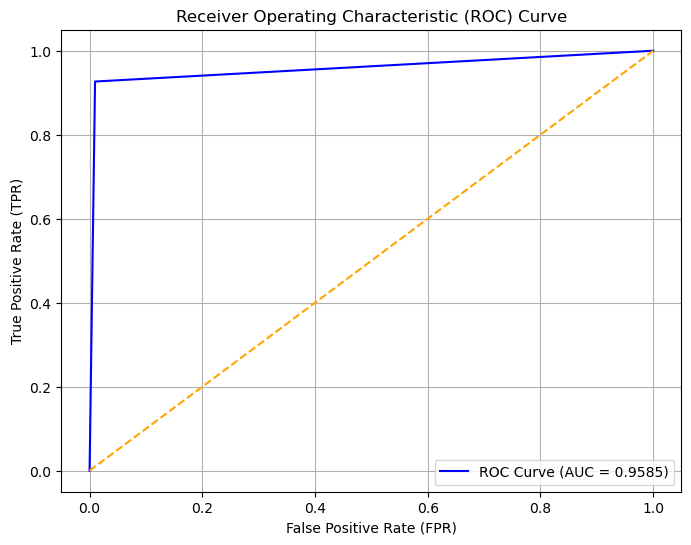

Cohen's Kappa: 0.8906
Matthews Correlation Coefficient (MCC): 0.8911


In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss, roc_auc_score, f1_score, precision_score, recall_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 테스트 데이터로 예측 수행
y_pred = best_model.predict(x_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report (Precision, Recall, F1-Score 포함)
class_report = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:\n", class_report)

# Balanced Accuracy (클래스 불균형 문제 해결을 위한 정확도)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# ROC-AUC 계산 (이진 분류에서는 다이렉트로 계산 가능)
y_pred_proba = best_model.predict(x_test)  # 확률 예측 (0/1 확률 중 1 클래스에 대한 확률 사용)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Cohen's Kappa 계산
cohen_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohen_kappa:.4f}")

# Matthews Correlation Coefficient (MCC) 계산
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


In [46]:
import joblib
# 최적 모델 저장
model_path = 'C:\\Users\\user\\Desktop\\best_random_forest_binary_model_1022.pkl'
joblib.dump(best_model, model_path)
print(f"모델이 '{model_path}'에 저장되었습니다.")

모델이 'C:\Users\user\Desktop\best_random_forest_binary_model_1022.pkl'에 저장되었습니다.
